In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [2]:
file = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
#file['churn'] = labelencoder.fit_transform(file['churn'])
le = LabelEncoder()
categorical_attr = []

for col in file.columns:
    if file[col].dtype == 'object':
        categorical_attr.append(col)
        file[col] = le.fit_transform(file[col])
file.describe()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,437.182418,1666.00000,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,14.824911,39.822106,42.371290,962.29855,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,0.000000,1.000000,408.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,74.000000,408.000000,833.00000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,26.000000,101.000000,415.000000,1666.00000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,39.000000,127.000000,510.000000,2499.00000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,50.000000,243.000000,510.000000,3332.00000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [3]:
file.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,1926,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,1575,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,1117,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,1707,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,110,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


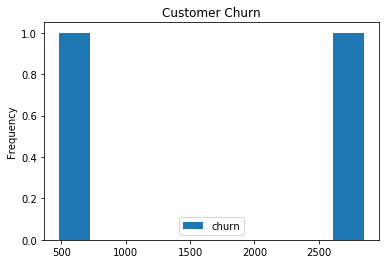

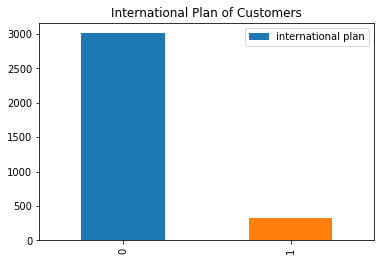

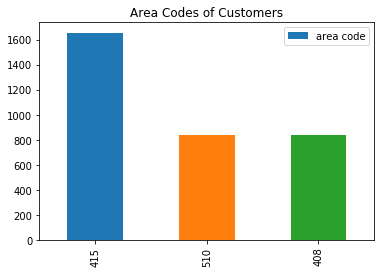

In [4]:
file['churn'].value_counts().plot(kind='bar', label='churn')
plt.legend()
plt.title('Customer Churn');
plt.show()

file['international plan'].value_counts().plot(kind='bar', label='international plan')
plt.legend()
plt.title('International Plan of Customers');
plt.show()

file['area code'].value_counts().plot(kind='bar', label='area code')
plt.legend()
plt.title('Area Codes of Customers');
plt.show()

In [5]:
#file=file.drop(columns=['international plan', 'voice mail plan','area code','churn'])
#file.head()

In [6]:
outlier_arr = []
outlier_cols = ['total day minutes', 'total day calls', 
                'total eve minutes', 'total eve calls', 'total night minutes', 'total night calls']
for col in outlier_cols:
    u = np.median(file[col])
    s = np.std(file[col])
    #cnt_t, cnt_f = 0, 0
    for pos in range(len(file.values)):
        if u - 2 * s < file[col][pos]< u + 2 * s:
            # To count the number of NON OUTLIERS in each feature
            #cnt_t += 1
            pass
        else:
            outlier_arr.append(pos)
            # To count number of outliers in each feature
            #cnt_f += 1
    #print(cnt_t, cnt_f)
    
    
    
    
print("Number of records with outliers:", len(outlier_arr))

Number of records with outliers: 902


In [7]:
# To be fixed
init_records = len(file.values)
for x in sorted(list(set(outlier_arr))):
    try:
        file.drop(file.index[x], inplace=True)
    except:
        break

In [8]:
print("No of records deleted", init_records - len(file.values))
file.describe()

No of records deleted 658


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000
mean,26.153645,100.321121,436.879252,1672.890093,0.097196,0.282991,8.275888,179.796822,100.534206,30.566007,201.484561,100.081121,17.126434,201.689495,100.164112,9.076120,10.197869,4.474393,2.753974,1.569346
std,14.838798,39.681789,42.163065,960.276896,0.296280,0.450536,13.793194,53.709601,20.086924,9.130570,50.691063,19.908085,4.308737,51.169089,19.538399,2.302662,2.779802,2.490595,0.750552,1.333629
min,0.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.200000,12.000000,2.650000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,73.000000,415.000000,848.500000,0.000000,0.000000,0.000000,144.000000,87.000000,24.480000,167.100000,87.000000,14.200000,166.950000,87.000000,7.515000,8.400000,3.000000,2.270000,1.000000
50%,26.000000,100.000000,415.000000,1681.000000,0.000000,0.000000,0.000000,179.700000,101.000000,30.550000,201.300000,100.000000,17.110000,203.100000,101.000000,9.140000,10.300000,4.000000,2.780000,1.000000
75%,39.000000,127.000000,415.000000,2501.500000,0.000000,1.000000,20.000000,216.350000,114.000000,36.780000,236.350000,114.000000,20.090000,237.300000,113.500000,10.680000,12.000000,6.000000,3.240000,2.000000
max,50.000000,243.000000,510.000000,3332.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,18.400000,20.000000,4.970000,9.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000196878CEF60>,
      dtype=object)

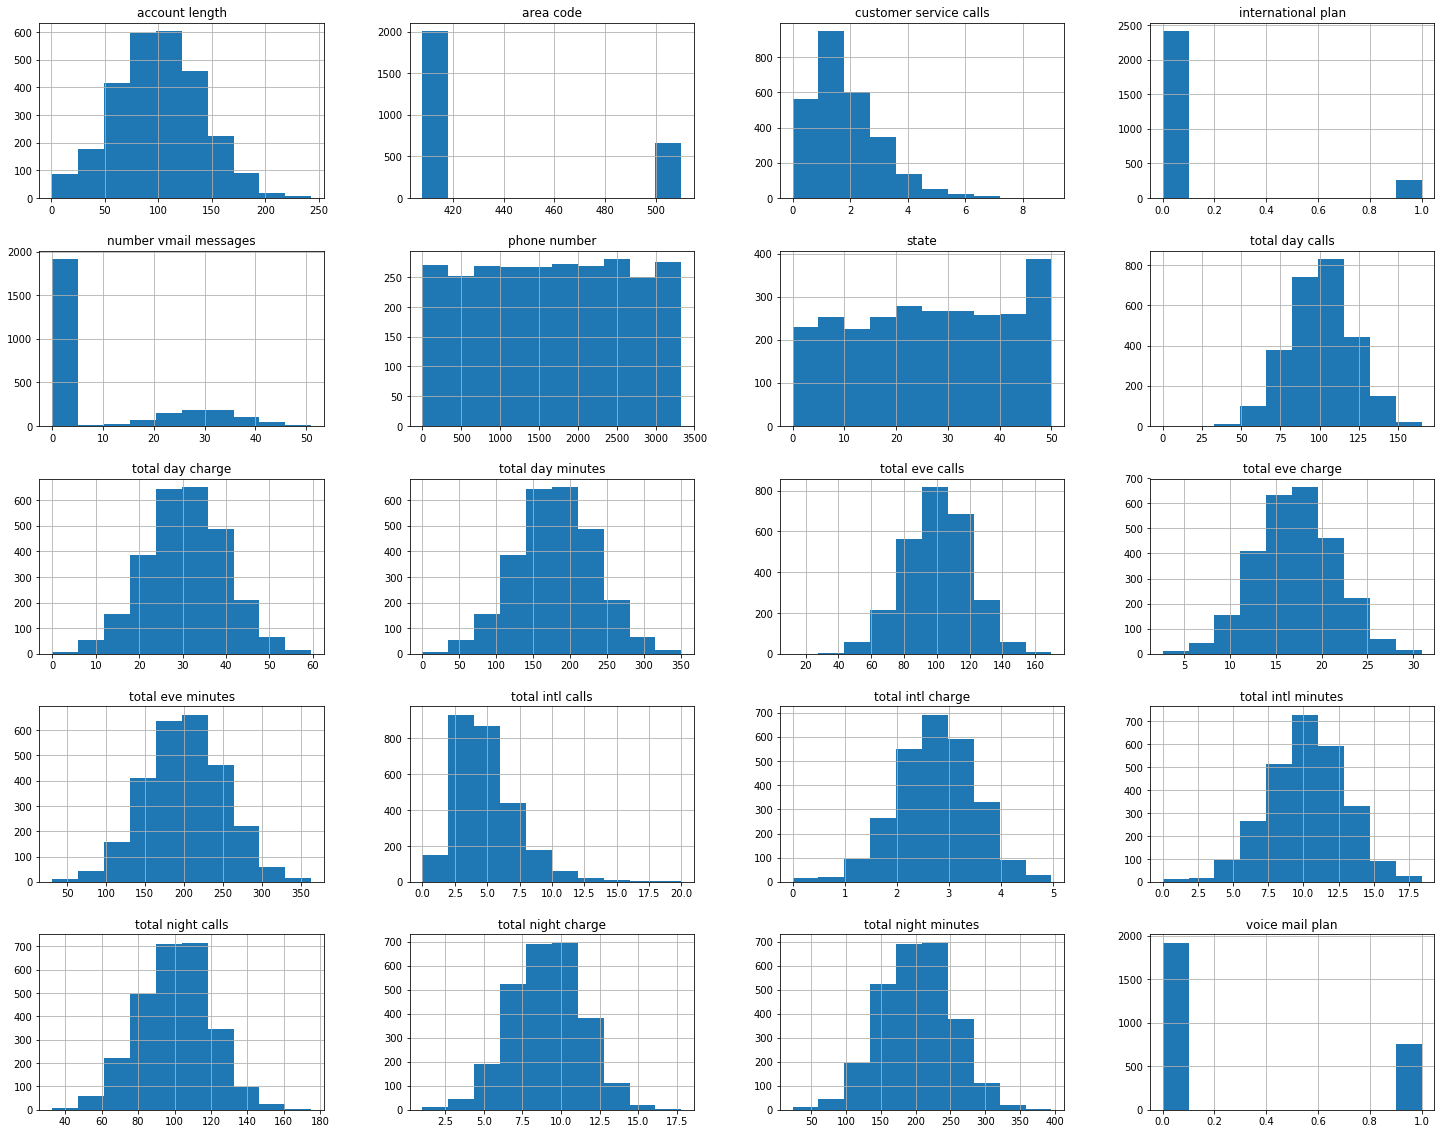

In [9]:
file[file.dtypes[(file.dtypes=="float64")|(file.dtypes=="int64")]
                        .index.values].hist(figsize=[25,20])

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

y = file.churn
x = file.drop('churn', axis = 1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

alg_acc = []

In [13]:
from sklearn.metrics import accuracy_score

clf=RandomForestClassifier(n_estimators = 25)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print ("Accuracy:", accuracy_score(pred, y_test))

Accuracy: 0.9383177570093458
